In [ ]:
import numpy as np
import pandas as pd
import pickle as pickl
import matplotlib.pyplot as plt
#%matplotlib widget

# Para montar o Google Drive na máquina remota
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

#path = '/content/drive/MyDrive/ColabNotebooks/OU3/'
#path = '/content/drive/MyDrive/Classroom/OpUnit3_files/OU3_Python/'
#path = '/content/drive/MyDrive/PFG_EQ/PFG_Mateus_Ferreira/'
path = '/content/drive/MyDrive/PFG_Mateus_Ferreira/'

# Para ler/carregar o banco de dados dos componentes
with open(path + 'databank_properties_2022.pickle', 'rb') as handle:
    dados, all_units = pickl.load(handle)
print(dados.shape)

# Para o carregamento das funções úteis
# Incluindo uma pasta do drive (mounted) no path do COLAB
import sys
sys.path.append(path)

# Carregamento das funções úteis
import OU3_funcoes_uteis_v05_2 as ou3
import TEQ_funcoes_uteis_v06 as teq

Mounted at /content/drive
(468, 31)


# **1º Passo**

*   O tambor de Flash é um equipamento bastante utilizado na insdústria química e, também, pode ser considerado uma destilação contendo um único estágio de equilílibrio líquido vapor $(ELV)$, isto é, uma destilação integral. Essa operação unitária tem como objetivo a separação contínua de dois ou mais componentes de uma corrente de entrada (F) em função de suas diferenças grande de volatilidade. Ou seja, na saída de topo do tambor é gerada uma corrente de topo na fase vapor (V), majoritariamente com o componente mais volátil e uma corrente de fundo na fase líquida (L), majoritariamente com o componente menos volátil.

*   A imagem a seguir ilustra o sistema:

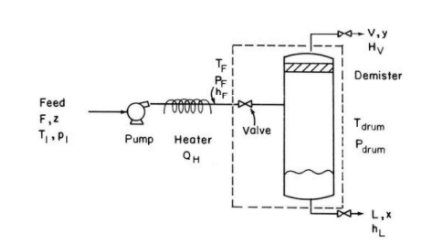

*   O ELV pode ser determinado matematicamente através da denominada Lei de Raoult:

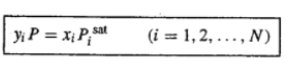


*   Raoult considera duas hipóteses para elaboração do seu modelo.

- A fase vapor é constituída de gás ideal.

- A fase líquida é constituída de solução ideal.

*   Dessa forma, para um modelo de tambor de Flash não ideal, a Lei de Raoult se torna ineficaz ao descrever o sistema.

*   Com isso, foi desenvolvida a abordagem $\gamma$/$\Phi$, no qual se utiliza a Lei de Raoult Modificada, dada pela equação a seguir:

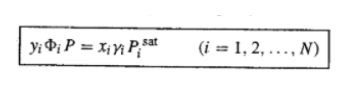

*   Nessa abordagem são inseridos dois novos fatores:

- Coeficiente de atividade $(\gamma)$
- Fator de fugacidade $(\Phi)$

*   O coeficiente de atividade $(\gamma)$ é responsável por predizer o quão afastado da idealidade uma espécie presente em uma solução está. Pode ser determinado através da correlação de Margules.


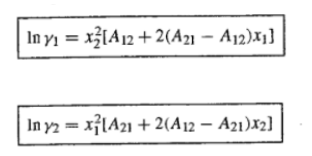


*   O coeficiente de fugacidade $(\Phi)$ é responsável por predizer o quão afastado da idealidade uma espécie está em relação a um gás ideal. E pode ser determinado através do modelo de $SRK$.

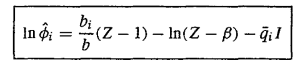

*   O parâmetro I é determinado pela seguinte equação $(Eq. 6.65 SVNA)$.

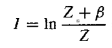

*   Os parâmetros $\beta$ e $q$ são determinados a partir das equações $\text{(Eq. 14.40 e 14.41, respectivamente)}$

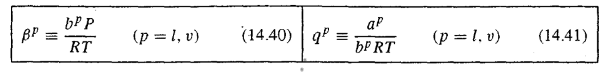

*   Enquanto $Z$ é determinado pela equação $\text{(Eq. 14.39)}$

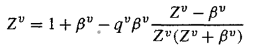

*   Os parâmetro $a$, $b$, $\overline{q}_1$, $\overline{q}_2$

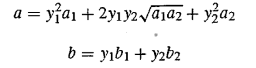

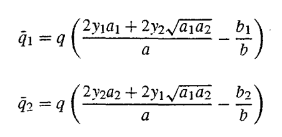


*   Por fim, para determinar $a_i$ e $b_i$, utilizou-se as seguintes euqações $\text{(Eq. 14.31 e 14.32)}$

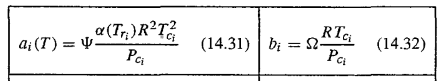

*   Os demais parâmetros contidos na equação acima foram retirados da Tabela 3.1.

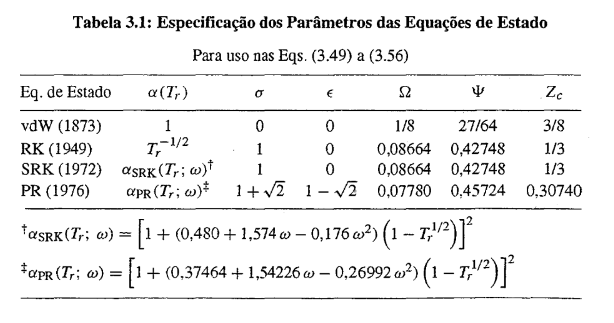


# **2º Passo**

*   Modelagem Matemática do Sistema, que consiste em identificar as variáveis conhecidas e incógnitas do sistema.

|Variáveis conhecidas|Incógnitas|
|:------------------:|:--------:|
|    $$P_{Flash}$$   |    x     |
|    $$T_{Flash}$$   |    y     |
|      $$z_F$$       |    V     |
|        F           |    L     |
|    $$P_i^{vapor}$$ |$$\gamma$$|
|                    | $$\phi$$ |
|                    | $$K_i$$  |

*   Fazendo uma análise acerca dos graus de liberdade, podemos observar que em relação às incógnitas temos 2 NC + 5, como é um sistema binário $NC=2$, portanto, o número de equações $(N.E)$ necessárias para resolver o sistema são $9$:

$$N.E = 2\cdot 2 + 5$$
$$N.E = 9 $$

\begin{cases}
\Phi_1 \cdot y_1 \cdot P_{flash} = x_1 \cdot P_1^{vap}\cdot \gamma_1 \\
\Phi_2 \cdot y_2 \cdot P_{flash} = x_2 \cdot P_2^{vap} \cdot \gamma_2 \\
y_1 + y_2 = 1 \\
x_1 + x_2 = 1 \\
f_v = \frac {V}{F} \\
F = V + L \\
z_1 \cdot F = y_1 \cdot V + x_1 \cdot L \\
K_1 = \frac {\gamma_1 \cdot P_1^{vap}}{\Phi_1 \cdot P_{flash}}\\
K_2 = \frac {\gamma_2 \cdot P_2^{vap}}{\Phi_2 \cdot P_{flash}}
\end{cases}

# **3º Passo**

*   Solucionando o tambor de Flash para obter o $"CHUTE"$ inicial para as composições da fase líquida $x$ e fase vapor $y$, que será utilizada no cálculo do fator de fugacidade e coeficiente de atividade.

In [ ]:
#Filtrar os dados referentes ao Etanol
dados_componente1 = dados.name.str.contains('ethanol', case=False)
dados[dados_componente1]

,num,name,molar_mass,fusion_point,boiling_point,critical_temp,critical_pressure,critical_volume,zc,acentric_factor,...,pvap_a,pvap_b,pvap_c,temp_max_pvap,temp_min_pvap,pvap_h_a,pvap_h_b,pvap_h_c,pvap_h_d,delta_h_vap_bp
233,102,ETHANOL,46.069,159.1,351.5,516.2,63.0,167.0,0.248,0.635,...,18.9119,3803.98,-41.68,369.0,270.0,83.319,-7994.9,-9.201,2.35,9260.0
297,62,METHANOL,32.042,175.5,337.8,512.6,79.9,118.0,0.224,0.559,...,18.5875,3626.55,-34.29,364.0,257.0,72.268,-7064.2,-7.680,1.86,8426.0
327,108,MONOETHANOLAMINE,61.084,283.5,443.5,614.0,44.0,196.0,0.170,NaN,...,17.8174,3988.33,-86.93,477.0,344.0,NaN,NaN,NaN,NaN,12000.0


In [ ]:
#Filtrar os dados referentes ao Tolueno
dados_componente2 = dados.name.str.contains('toluene', case=False)
dados[dados_componente2]

,num,name,molar_mass,fusion_point,boiling_point,critical_temp,critical_pressure,critical_volume,zc,acentric_factor,...,pvap_a,pvap_b,pvap_c,temp_max_pvap,temp_min_pvap,pvap_h_a,pvap_h_b,pvap_h_c,pvap_h_d,delta_h_vap_bp
441,286,TOLUENE,92.141,178.0,383.8,591.7,40.6,316.0,0.264,0.257,...,16.0137,3096.52,-53.67,410.0,280.0,56.785,-6283.5,-5.681,4.84,7930.0


In [ ]:
#Selecionando as duas substâbcias presentes na mistura binária e guardando em uma lista
lista_componentes = [102, 286]
display(dados[dados['num'].isin(lista_componentes)][['num','name']])

,num,name
233,102,ETHANOL
441,286,TOLUENE


In [ ]:
nc = len(lista_componentes)
nc

2

In [ ]:
# Checando o ponto de ebulição do metil-etilcetona e tolueno, respectivamente
T_ebu = dados[dados['num'].isin(lista_componentes)]['boiling_point']
T_ebu = T_ebu.tolist()
T_ebu

[351.5, 383.8]

In [ ]:
#Definindo a concentração da corrente de entrada (z) e a pressão do Flash
z = np.array([0.5,0.5])

nc = 2
P_eq     = 760.0 # mmHg
P_eq_bar = 1.0133 # bar

#Calculando a temperatura no ponto de bolha e ponto de orvalho para essa mistura
tb_to = ou3.f_calculo_PbPo_db('T', P_eq, z, lista_componentes, dados)
tb_to

(361.83493256069744, 370.0772760732191, array([351.5, 383.8]))

In [ ]:
#Definindo T_flash entre o ponto de bolha e o ponto de orvalho
T_flash = 365.0  #K
T_flash

365.0

In [ ]:
# Valores do a_W - Tabela 12.5, p. 354 SVNA
# etanol = 1
# tolueno = 2
a_W = np.zeros((nc,nc))
# etanol e tolueno
a_W[1-1,2-1] = 1556.45
a_W[2-1,1-1] = 210.52
#
a_W

array([[   0.  , 1556.45],
       [ 210.52,    0.  ]])

In [ ]:
V_m = ou3.f_Vol_molar_db(lista_componentes, dados)
V_m

array([ 58.38910013, 106.27566321])

In [ ]:
#Cálculo de BOL_T utilizando Phi genérico e Gamma de Wilson

def f_calc_T_Pb_nid_Wilson_01_db(z, P_eq, a_W, V_m, lista_componentes, dados):
  ''' Algoritmo de BOL_T descrito na figura 14.3 p.409 do SVNA
  '''
  nc = z.shape[0]
  resp = ou3.f_calculo_PbPo_db('T', P_eq, z, lista_componentes, dados)
  T_pb_ideal = resp[0]
  T_pb = T_pb_ideal
  x_eq = z
  y_eq = ou3.f_sol_RR_flash_db(z, P_eq, T_pb, lista_componentes, dados)['y_eq']
  K_comp = ou3.f_K_Raoult_mod_Wilson_01_db(T_pb, P_eq, x_eq, y_eq, a_W, V_m,
                                       lista_componentes, dados)
  # Eq.14.8 do SVNA
  y_eq_novo = K_comp * x_eq
  phi_comp = ou3.f_phi_gen(y_eq_novo, T_pb, P_eq)         #Phi genérico
  gama_comp = ou3.f_gama_Wilson(x_eq, T_pb, a_W, V_m)
  # Componente de referência
  jj = nc - 1
  # Eq. 14.13 do SVNA
  fator = x_eq*gama_comp/phi_comp
  Pvap_comp = ou3.f_Pvap_Antoine_vetor_db(T_pb, lista_componentes, dados)
  razao = Pvap_comp/Pvap_comp[jj]
  somat = fator @ razao
  Pvap_novo = P_eq / somat
  # Eq. 14.15 do SVNA
  T_pb_novo = ou3.f_Teq_Antoine_db(Pvap_novo, lista_componentes[jj], dados)[0]
  erro_T = T_pb_novo - T_pb
  # Tolerância para convergência
  epsilon = 1.0e-3
  #
  T_pb = T_pb_novo
  y_eq = y_eq_novo
  k_iter = 1
  n_max_iter = 20
  while ((np.abs(erro_T).mean() > epsilon)&(k_iter < n_max_iter)):
    print(k_iter, np.abs(erro_T).mean())
    K_comp = ou3.f_K_Raoult_mod_Wilson_01_db(T_pb, P_eq, x_eq, y_eq,
                                       a_W, V_m, lista_componentes, dados)
    y_eq_novo = K_comp * x_eq
    phi_comp  = ou3.f_phi_gen(y_eq_novo, T_pb, P_eq)
    gama_comp = ou3.f_gama_Wilson(x_eq, T_pb, a_W, V_m)
    fator     = x_eq*gama_comp/phi_comp
    Pvap_comp = ou3.f_Pvap_Antoine_vetor_db(T_pb, lista_componentes, dados)
    T_pb_novo = np.zeros((nc,))
    #
    for j in range(0,nc):
      razao = Pvap_comp/Pvap_comp[j]
      somat = fator @ razao
      Pvap_novo = P_eq / somat
      T_pb_novo[j] = ou3.f_Teq_Antoine_db(Pvap_novo, lista_componentes[j], dados)[0]
    erro_T = T_pb_novo[jj] - T_pb
    T_pb = T_pb_novo[jj] # T_pb_novo.mean()
    y_eq = y_eq_novo
    k_iter += 1
  #
  return {'T_pb': T_pb, 'y_eq':y_eq, 'erro_T': np.abs(erro_T)}

In [ ]:
z

array([0.5, 0.5])

In [ ]:
#Calculo do ponto de bolha não ideal pelo modelo de Wilson
sol_T_Pb = f_calc_T_Pb_nid_Wilson_01_db(z, P_eq, a_W, V_m, lista_componentes, dados)
sol_T_Pb

1 5.469334018547727
2 0.45740269431280467
3 0.03857397268683371
4 0.0032507775348449286


{'T_pb': 356.7874040696316,
 'y_eq': array([0.6906884 , 0.30932083]),
 'erro_T': 0.0002739716789506019}

$$ y_i \cdot P \cdot \Phi_i = x_i \cdot P_i^{vap}(T) \cdot \gamma_i$$

Como:

$$ K_i = \frac{y_i}{x_i} $$

Então:

$$ K_i = \frac{P_i^{vap}(T) \cdot \gamma_i}{P \cdot \Phi_i} $$


In [ ]:
def f_K_Wilson_phi_1(x, y, T, P, a_W, V_m, lista_componentes, dados):
  nc = x.shape[0]
  # Função para o cálculo do phi
  phi_comp  = ou3.f_phi_gen(y, T, P)
  # Para o cálculo do gama
  gama_comp = ou3.f_gama_Wilson(x, T, a_W, V_m)
  # Cálculo de P_vap
  Pvap_comp = ou3.f_Pvap_Antoine_vetor_db(T, lista_componentes, dados)
  Pvap_comp_bar = Pvap_comp * (1.0133/760.0)
  # Cálculo do K
  K = np.zeros((nc,))
  for i in range(0, nc):
    K[i] = (Pvap_comp_bar[i]*gama_comp[i])/(P*phi_comp[i])
  #
  return K

In [ ]:
T_eq = 357.0
x = np.array([0.5, 0.5]) #Composição (z) da entrada
y = np.array([0.6906884 , 0.30932083]) #y calculado no ponto de bolha

In [ ]:
#Cálculo do K com o phi genérico (phi = 1, certo?)
f_K_Wilson_phi_1(x, y, T_eq, P_eq_bar, a_W, V_m, lista_componentes, dados)

array([1.39258525, 0.6230006 ])

In [ ]:
dados.columns

Index(['num', 'name', 'molar_mass', 'fusion_point', 'boiling_point',
       'critical_temp', 'critical_pressure', 'critical_volume', 'zc',
       'acentric_factor', 'liq_density', 'temp_ref_liq_density',
       'dipole_moment', 'cp_a', 'cp_b', 'cp_c', 'cp_d', 'visc_b', 'visc_c',
       'delta_h0f_gas', 'delta_g0f_gas', 'pvap_a', 'pvap_b', 'pvap_c',
       'temp_max_pvap', 'temp_min_pvap', 'pvap_h_a', 'pvap_h_b', 'pvap_h_c',
       'pvap_h_d', 'delta_h_vap_bp'],
      dtype='object')

In [ ]:
all_units

,num,name,molar_mass,fusion_point,boiling_point,critical_temp,critical_pressure,critical_volume,zc,acentric_factor,...,pvap_a,pvap_b,pvap_c,temp_max_pvap,temp_min_pvap,pvap_h_a,pvap_h_b,pvap_h_c,pvap_h_d,delta_h_vap_bp
1,True,True,g/mol,K,K,K,atm,cm3/mol,1,1,...,1,K,K,K,K,1,K,1,K2/mmHg,cal/mol


In [ ]:
# Obtendo: Tc, Pc_ omega
Tc_comp = dados[dados['num'].isin(lista_componentes)]['critical_temp'].to_numpy()
Pc_comp = dados[dados['num'].isin(lista_componentes)]['critical_pressure'].to_numpy()*(1.01325/1.0)
om_comp = dados[dados['num'].isin(lista_componentes)]['acentric_factor'].to_numpy()

In [ ]:
Tc_comp

array([516.2, 591.7])

In [ ]:
Pc_comp

array([63.83475, 41.13795])

In [ ]:
om_comp

array([0.635, 0.257])

In [ ]:
Tc_mix = y @ Tc_comp
Pc_mix = y @ Pc_comp
om_mix = y @ om_comp

Tc_mix, Pc_mix, om_mix

(539.558487191, 56.8147461803985, 0.51808258731)

In [ ]:
i_EOS = 4
R_ig = 83.14 # bar*cm3/mol/K
resp_param_EOS = teq.f_param_EOS_generalizada(i_EOS,T_eq, P_eq_bar, Tc_mix, Pc_mix,
                                              om_mix,R_ig)
param_EOS = resp_param_EOS['p_EOS']
param_cubica = teq.f_conv_param(param_EOS)
Z_EOS = teq.f_raizes_cubica(param_cubica)['x']
Z_EOS

array([0.00258016, 0.97449835, 0.02082436])

In [ ]:
Z_l_mix = np.min(Z_EOS)
Z_v_mix = np.max(Z_EOS)
Z_l_mix, Z_v_mix

(0.0025801571466322892, 0.974498345918767)

In [ ]:
resp_EOS = teq.f_calc_param_EOS_mistura(i_EOS, y, T_eq, P_eq_bar, Tc_comp,
                                        Pc_comp, om_comp, R_ig)
resp_EOS

{'Tr_comp': array([0.69159241, 0.60334629]),
 'Pr_comp': array([0.0158738 , 0.02463176]),
 'alpha_comp': array([1.46326683, 1.36455823]),
 'beta_comp': array([0.00178571, 0.0031762 ]),
 'a_comp': array([19304858.53230607, 36704289.40815319]),
 'b_comp': array([52.30587306, 93.03546668]),
 'param_EOS': array([ 2.21583325e-03,  1.25076461e+01, -4.14213562e-01,  2.41421356e+00]),
 'Psi': 0.45724,
 'Omega': 0.0778}

In [ ]:
Tr_comp    = resp_EOS['Tr_comp']
Pr_comp    = resp_EOS['Pr_comp']
alpha_comp = resp_EOS['alpha_comp']
a_EOS      = resp_EOS['a_comp']
b_EOS      = resp_EOS['b_comp']

In [ ]:
# a    = teq.f_a_EOS_mistura(a_EOS, z)['a']
# b    = teq.f_b_EOS_mistura(b_EOS, z)
# q    = teq.f_q_EOS_mistura(T_eq, R_ig, a, b)
# beta = teq.f_beta_EOS_mistura(T_eq, P_eq_bar, R_ig, b)

In [ ]:
param_EOS = resp_EOS['param_EOS']
param_cubica = teq.f_conv_param(param_EOS)
Z_EOS14 = teq.f_raizes_cubica(param_cubica)['x']
Z_EOS14


array([0.00275154, 0.97395297, 0.02107965])

In [ ]:
Z_l_mix14 = np.min(Z_EOS14)
Z_v_mix14 = np.max(Z_EOS14)
Z_l_mix14, Z_v_mix14

(0.002751538232376116, 0.9739529748389439)

In [ ]:
a_M = teq.f_a_EOS_mistura(a_EOS, z)['a_M']
a_M

array([[19304858.53230607, 26618999.12756334],
       [26618999.12756334, 36704289.40815319]])

In [ ]:
phi_chapeu = teq.f_phi_chapeu_EOS_eq_14_50(Z_v_mix14, T_eq, P_eq_bar, R_ig,
                                           a_EOS, b_EOS, y, param_EOS)
phi_chapeu

array([0.97993723, 0.96266261])

In [ ]:
phi_sat = teq.f_phi_sat_comp(T_eq, i_EOS, lista_componentes, dados)
phi_sat

array([0.97474957, 0.98296765])

In [ ]:
phi = phi_chapeu/phi_sat
phi

array([1.00532204, 0.97934312])

In [ ]:
#Recebe a pressão em BAR
def f_fator_Poynting(T, P, lista_componentes, dados):
  ''' Calcula o fator de correção de Poynting segundo a Eq. 11.44 p.297
  '''
  nc = len(lista_componentes)
  R_ig = 83.14 # bar*cm3/mol/K
  V_m = ou3.f_Vol_molar_db(lista_componentes, dados)
  Pvap_comp = ou3.f_Pvap_Antoine_vetor_db(T, lista_componentes, dados)*(1.01325/760.0)
  fatPoy = np.zeros((nc,))
  for i in range(0,nc):
    num       = V_m[i]*(P - Pvap_comp[i])
    den       = R_ig*T
    fatPoy[i] = np.exp(-num/den)
  return fatPoy

In [ ]:
f_fator_Poynting(T_eq, P_eq_bar, lista_componentes, dados)

array([1.00047741, 0.99795898])

In [ ]:
def f_phi_ELV_EOS(T, P, y, i_EOS, lista_componentes, dados):
    #nc   = y.shape[0]
    R_ig = 83.14 # bar*cm3/mol/K
    # Obtendo: Tc, Pc_ omega
    Tc_comp = dados[dados['num'].isin(lista_componentes)]['critical_temp'].to_numpy()
    Pc_comp = dados[dados['num'].isin(lista_componentes)]['critical_pressure'].to_numpy()*(1.0133/1.0)
    om_comp = dados[dados['num'].isin(lista_componentes)]['acentric_factor'].to_numpy()
    #
    resp_EOS     = teq.f_calc_param_EOS_mistura(i_EOS, y, T, P, Tc_comp,
                                                Pc_comp, om_comp, R_ig)
    param_EOS    = resp_EOS['param_EOS']
    param_cubica = teq.f_conv_param(param_EOS)
    Z_all        = teq.f_raizes_cubica(param_cubica)['x']
    Z_v          = np.max(Z_all)
    a_EOS        = resp_EOS['a_comp']
    b_EOS        = resp_EOS['b_comp']
    phi_chapeu   = teq.f_phi_chapeu_EOS_eq_14_50(Z_v, T, P, R_ig, a_EOS,
                                                 b_EOS, y, param_EOS)
    #
    phi_sat      = teq.f_phi_sat_comp(T, i_EOS, lista_componentes, dados)
    #
    fatPoy = f_fator_Poynting(T, P, lista_componentes, dados)
    #
    phi = (phi_chapeu/phi_sat)*fatPoy
    return {'phi': phi, 'phi_chapeu': phi_chapeu, 'phi_sat': phi_sat,
            'fatPoy': fatPoy }

In [ ]:
f_phi_ELV_EOS(T_eq, P_eq_bar, y, i_EOS, lista_componentes, dados)

{'phi': array([1.00580301, 0.97734612]),
 'phi_chapeu': array([0.97993822, 0.96266445]),
 'phi_sat': array([0.97474957, 0.98296765]),
 'fatPoy': array([1.00047741, 0.99795898])}

In [ ]:
phi = f_phi_ELV_EOS(T_eq, P_eq_bar, y, i_EOS, lista_componentes, dados)['phi']
phi

array([1.00580301, 0.97734612])

In [ ]:
#Recebe a pressão em BAR
def f_K_Wilson_phi_EOS(x, y, T, P, a_W, V_m, i_EOS, lista_componentes, dados):
  nc = x.shape[0]
  # Função para o cálculo do phi
  phi_comp  = f_phi_ELV_EOS(T, P, y, i_EOS, lista_componentes, dados)['phi']
  # Para o cálculo do gama
  gama_comp = ou3.f_gama_Wilson(x, T, a_W, V_m)
  # Cálculo de P_vap
  Pvap_comp = ou3.f_Pvap_Antoine_vetor_db(T, lista_componentes, dados)
  Pvap_comp_bar = Pvap_comp *(1.0133/760.0)
  # Cálculo do K
  K = np.zeros((nc,))
  for i in range(0,nc):
    K[i] = (Pvap_comp_bar[i]*gama_comp[i])/(P*phi_comp[i])
  #
  return K

In [ ]:
f_K_Wilson_phi_EOS(x, y, T_eq, P_eq_bar, a_W, V_m, i_EOS, lista_componentes, dados)

array([1.38455068, 0.63744111])

In [ ]:
#Aqui a pressão entra em BAR, tem que mudar o nome da variável para ficar mais claro para o usuário!
def f_calc_T_Pb_nid_Wilson_EOS_db(z, P_eq, a_W, V_m, i_EOS, lista_componentes, dados):
  ''' Algoritmo de BOL_T descrito na figura 14.3 p.409 do SVNA
      K calculado utilizando a abordagem gamma/phi com:
      gamma: modelo de Wilson
      phi:   calculado com as equações do capítulo 14 usando a razão
             phi_chapeu/phi_sat
  '''
  nc = z.shape[0]
  # Cálculo do ELV usando Raoult - sistema ideal
  P_eq_mmHg = P_eq*(760.0/1.01325)
  resp = ou3.f_calculo_PbPo_db('T', P_eq_mmHg, z, lista_componentes, dados)
  T_pb_ideal = resp[0]
  T_pb = T_pb_ideal
  x_eq = z
  y_eq = ou3.f_sol_RR_flash_db(z, P_eq_mmHg, T_pb, lista_componentes, dados)['y_eq']
  # K_comp = ou3.f_K_Raoult_mod_Wilson_01_db(T_pb, P_eq_mmHg, x_eq, y_eq, a_W, V_m,
  #                                      lista_componentes, dados)
  K_comp = f_K_Wilson_phi_EOS(x_eq, y_eq, T_pb, P_eq, a_W, V_m, i_EOS,
                              lista_componentes, dados)
  # Eq.14.8 do SVNA
  y_eq_novo = K_comp * x_eq
  #phi_comp = ou3.f_phi_gen(y_eq_novo, T_pb, P_eq_mmHg)
  phi_comp = f_phi_ELV_EOS(T_pb, P_eq, y_eq_novo, i_EOS,
                           lista_componentes, dados)['phi']
  gama_comp = ou3.f_gama_Wilson(x_eq, T_pb, a_W, V_m)
  # Componente de referência
  jj = nc - 1
  # Eq. 14.13 do SVNA
  fator = x_eq*gama_comp/phi_comp
  Pvap_comp = ou3.f_Pvap_Antoine_vetor_db(T_pb, lista_componentes, dados)*(1.01325/760.0)
  razao = Pvap_comp/Pvap_comp[jj]
  somat = fator @ razao
  Pvap_novo = P_eq / somat
  # Eq. 14.15 do SVNA
  T_pb_novo = ou3.f_Teq_Antoine_db(Pvap_novo*(760.0/1.01325),
                                   lista_componentes[jj], dados)[0]
  erro_T = T_pb_novo - T_pb
  # Tolerância para convergência
  epsilon = 1.0e-3
  #
  T_pb = T_pb_novo
  y_eq = y_eq_novo
  k_iter = 1
  n_max_iter = 20
  while ((np.abs(erro_T).mean() > epsilon)&(k_iter < n_max_iter)):
    print(k_iter, np.abs(erro_T).mean())
    # K_comp = ou3.f_K_Raoult_mod_Wilson_01_db(T_pb, P_eq_mmHg, x_eq, y_eq,
    #                                    a_W, V_m, lista_componentes, dados)
    K_comp = f_K_Wilson_phi_EOS(x_eq, y_eq, T_pb, P_eq, a_W, V_m, i_EOS,
                              lista_componentes, dados)
    y_eq_novo = K_comp * x_eq
    #phi_comp  = ou3.f_phi_gen(y_eq_novo, T_pb, P_eq_mmHg)
    phi_comp = f_phi_ELV_EOS(T_pb, P_eq, y_eq_novo, i_EOS,
                             lista_componentes, dados)['phi']
    gama_comp = ou3.f_gama_Wilson(x_eq, T_pb, a_W, V_m)
    fator     = x_eq*gama_comp/phi_comp
    Pvap_comp = ou3.f_Pvap_Antoine_vetor_db(T_pb, lista_componentes,
                                            dados)*(1.01325/760.0)
    T_pb_novo = np.zeros((nc,))
    #
    for j in range(0,nc):
      razao = Pvap_comp/Pvap_comp[j]
      somat = fator @ razao
      Pvap_novo = P_eq / somat
      T_pb_novo[j] = ou3.f_Teq_Antoine_db(Pvap_novo*(760.0/1.01325),
                                          lista_componentes[j], dados)[0]
    erro_T = T_pb_novo[jj] - T_pb
    T_pb = T_pb_novo[jj] # T_pb_novo.mean()
    y_eq = y_eq_novo
    k_iter += 1
  #
  return {'T_pb': T_pb, 'y_eq':y_eq, 'erro_T': np.abs(erro_T)}

In [ ]:
sol_T_Pb_EOS = f_calc_T_Pb_nid_Wilson_EOS_db(z, P_eq_bar, a_W, V_m, i_EOS,
                                             lista_componentes, dados)
sol_T_Pb_EOS

1 5.38197970461448
2 0.25255641573187404
3 0.013961012331037637


{'T_pb': 356.69368671826743,
 'y_eq': array([0.684435 , 0.3155885]),
 'erro_T': 0.0007661238371952095}

In [ ]:
sol_T_Pb = f_calc_T_Pb_nid_Wilson_01_db(z, P_eq, a_W, V_m,
                                        lista_componentes, dados)
sol_T_Pb

1 5.469334018547727
2 0.45740269431280467
3 0.03857397268683371
4 0.0032507775348449286


{'T_pb': 356.7874040696316,
 'y_eq': array([0.6906884 , 0.30932083]),
 'erro_T': 0.0002739716789506019}

In [ ]:
#Cálculo do ponto de bolha não ideal pela abordagem Gama(Wilson) - Phi(EOS do cap. 14 do SVNA)
f_calc_T_Pb_nid_Wilson_EOS_db(z, P_eq_bar, a_W, V_m, 1,
                                             lista_componentes, dados)

1 5.62362229599762
2 0.31748789083360407
3 0.020411785413955386
4 0.001303298043524137


{'T_pb': 356.51097875559066,
 'y_eq': array([0.68579706, 0.3142551 ]),
 'erro_T': 8.324751877353265e-05}

In [ ]:
#dir(teq)